<a href="https://colab.research.google.com/github/analuisamessias/data_science_project/blob/main/Projeto_ICD_Grupo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final Ciência de Dados**

Este notebook se propõe e apresentar os resultados obtidos ná análise dos casos de dengue no Brasil em 2024. Foram utilizados métodos estatísticos e ferramentas de visualização para identificar padrões, tendências e fatores de risco.



Matrícula e Nome dos alunos:

- **2020104746 - Ana Luisa Mendes**

- **2022043400 - Iago Nathan Araujo**

- **2022116830 - Laura Oliveira Ribeiro**

- **2022431302 - Lucas Wiermann**

### **Tema principal: Casos de Dengue**

O tema principal deste projeto é responder perguntas em relação aos casos de dengue no Brasil em 2024.

Para isso, foram extraídas bases de dados. As principais fontes dessas bases de dados foram:

- DATASUS - Portal de Dados do GOV Br
- (Portal de dados abertos) Prefeitura de Belo Horizonte
- INMETRO
- (Portal de dados abertos) Governo de Minas Gerais

### Imports para fazer as análises

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
import seaborn as sns
import plotly.graph_objs as go
from io import StringIO
from sklearn.linear_model import LinearRegression
import random
import scipy.stats as stats

## Tabela com a quantidade de casos no Brasil
As fontes foram retiradas da fonte de dados aberta do SUS
---> [DATASUS - GOV.BR](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebbr.def)

Para realizar as análises dos casos nos últimos 5 anos (2020-2024)

**OBS:** Os casos de 2024 são considerados de Janeiro a Julho

In [ ]:
# Importando os arquivos de casos de Dengue por UF de 2020-2024
colunas = ["UF de notificação", "Ign/Branco", "Inconclusivo", "Dengue", "Dengue com sinais de alarme", "Dengue grave", "Total"]
df_dengue20 = pd.read_csv("/content/tabela_dengue_UF_2020.csv.csv", sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df_dengue21 = pd.read_csv("/content/tabela_dengue_UF_2021.csv.csv", sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df_dengue22 = pd.read_csv("/content/tabela_dengue_UF_2022.csv.csv", sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df_dengue23 = pd.read_csv("/content/tabela_dengue_UF_2023.csv.csv", sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df_dengue24 = pd.read_csv("/content/tabela_dengue_UF_2024.csv.csv", sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)


In [ ]:
# Transformando todos os valores em numéricos nas tabelas e substituindo os registros - por 0
# Tabela 2020
df_dengue20.replace('-', 0, inplace=True)
for colunas in df_dengue20.columns:
    if colunas != 'UF de notificação':
        df_dengue20[colunas] = pd.to_numeric(df_dengue20[colunas], errors='coerce')

# Tabela 2021
df_dengue21.replace('-', 0, inplace=True)
for colunas in df_dengue21.columns:
    if colunas != 'UF de notificação':
        df_dengue21[colunas] = pd.to_numeric(df_dengue21[colunas], errors='coerce')

# Tabela 2022
df_dengue22.replace('-', 0, inplace=True)
for colunas in df_dengue22.columns:
    if colunas != 'UF de notificação':
        df_dengue22[colunas] = pd.to_numeric(df_dengue22[colunas], errors='coerce')

# Tabela 2023
df_dengue23.replace('-', 0, inplace=True)
for colunas in df_dengue23.columns:
    if colunas != 'UF de notificação':
        df_dengue23[colunas] = pd.to_numeric(df_dengue23[colunas], errors='coerce')

# Tabela 2024
df_dengue24.replace('-', 0, inplace=True)
for colunas in df_dengue24.columns:
    if colunas != 'UF de notificação':
        df_dengue24[colunas] = pd.to_numeric(df_dengue24[colunas], errors='coerce')

In [ ]:
# Visualizando a tabela de casos de dengue 2024
df_dengue24.head(27)

,UF de notificação,Ign/Branco,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave,Total
0,11 Rondônia,100.0,1101.0,3720.0,26.0,4.0,4951.0
1,12 Acre,313.0,1763.0,2599.0,8.0,2.0,4685.0
2,13 Amazonas,292.0,1777.0,5805.0,69.0,12.0,7955.0
3,14 Roraima,170.0,47.0,261.0,1.0,1.0,480.0
4,15 Pará,985.0,3981.0,13112.0,276.0,32.0,18386.0
5,16 Amapá,484.0,1361.0,5504.0,154.0,12.0,7515.0
6,17 Tocantins,581.0,1574.0,3405.0,67.0,4.0,5631.0
7,21 Maranhão,259.0,3246.0,6760.0,194.0,27.0,10486.0
8,22 Piauí,1000.0,2667.0,9947.0,674.0,63.0,14351.0
9,23 Ceará,1043.0,993.0,9761.0,149.0,17.0,11963.0


# Analisando a tabela

Vamos fazer os gráficos comparando os casos e os óbitos causados por dengue entre os anos de 2020 e 2024 para ficar mais fácil de visualizar se houve uma diferença grande ou pequena em relação aos números.

In [ ]:
# Calculando o total dos casos de dengue de 2020 a 2024
# OBS: Vamos pegar apenas os casos confirmados em dengue, excluindo 'Em branco' e 'Inconclusivo'
total_dengue_2020 = df_dengue20.loc[26, ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']].sum()
total_dengue_2021 = df_dengue21.loc[26, ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']].sum()
total_dengue_2022 = df_dengue22.loc[26, ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']].sum()
total_dengue_2023 = df_dengue23.loc[26, ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']].sum()
total_dengue_2024 = df_dengue24.loc[26, ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']].sum()

# Formatando os valores para facilitar visualização
total_dengue_2020_format = f'{total_dengue_2020:,.0f}'.replace(',', '.')
total_dengue_2021_format = f'{total_dengue_2021:,.0f}'.replace(',', '.')
total_dengue_2022_format = f'{total_dengue_2022:,.0f}'.replace(',', '.')
total_dengue_2023_format = f'{total_dengue_2023:,.0f}'.replace(',', '.')
total_dengue_2024_format = f'{total_dengue_2024:,.0f}'.replace(',', '.')

In [ ]:
# Imprimindo os resultados das somas
print(f'Total de casos de dengue em 2020: {total_dengue_2020_format}')
print(f'Total de casos de dengue em 2021: {total_dengue_2021_format}')
print(f'Total de casos de dengue em 2022: {total_dengue_2022_format}')
print(f'Total de casos de dengue em 2023: {total_dengue_2023_format}')
print(f'Total de casos de dengue em 2024: {total_dengue_2024_format}')

Total de casos de dengue em 2020: 44.454
Total de casos de dengue em 2021: 447.884
Total de casos de dengue em 2022: 1.243.350
Total de casos de dengue em 2023: 1.292.677
Total de casos de dengue em 2024: 5.001.525


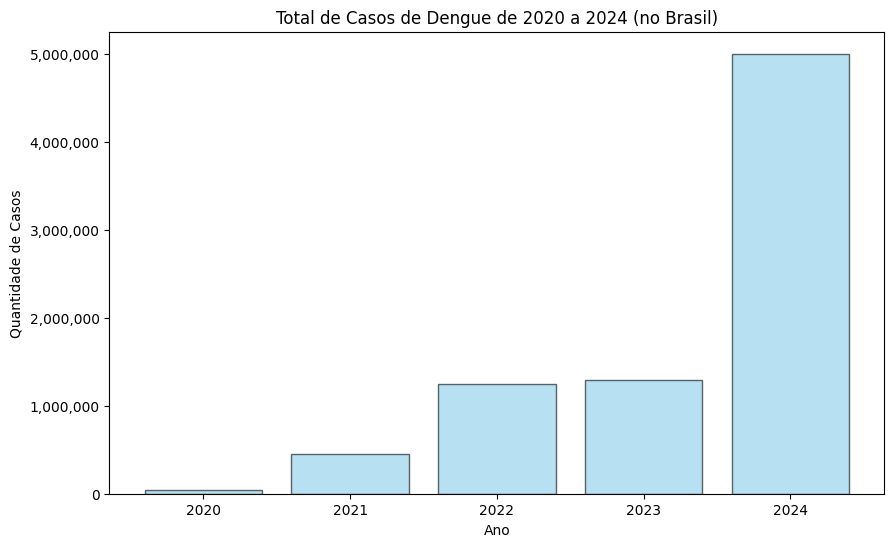

In [ ]:
%matplotlib inline

# Colocando os resultados em um gráfico
grafico_casos_dengue = {
    'Ano': [2020, 2021, 2022, 2023, 2024],
    'Total de Casos': [total_dengue_2020, total_dengue_2021, total_dengue_2022, total_dengue_2023, total_dengue_2024]
}
df_totais = pd.DataFrame(grafico_casos_dengue)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_totais['Ano'], df_totais['Total de Casos'], color='skyblue', alpha=0.6)
plt.xticks(df_totais['Ano'])

# Ajustar o eixo y para exibir em escala de milhar
plt.ticklabel_format(axis='y', style='plain')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Configurar o título e os rótulos dos eixos
plt.title('Total de Casos de Dengue de 2020 a 2024 (no Brasil)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')

plt.grid(False)

# Exibir o gráfico
plt.show()

A partir dos gráficos, podemos notar que houve um aumento bastante significativo na quantidade de casos causados pela Dengue no Brasil.

Até Julho de 2024, o Brasil registrou:
- **5.001.525 casos**

In [ ]:
comparacao_2024_2023 = total_dengue_2024 - total_dengue_2023
aumento_percentual_2024_2023 = (comparacao_2024_2023 / total_dengue_2023) * 100

comparacao_2024_2022 = total_dengue_2024 - total_dengue_2022
aumento_percentual_2024_2022 = (comparacao_2024_2022 / total_dengue_2022) * 100


print(f'Aumento percentual dos casos de dengue em 2024 em relação a 2023: {aumento_percentual_2024_2023:.2f}%')
print(f'Aumento percentual dos casos de dengue em 2024 em relação a 2022: {aumento_percentual_2024_2022:.2f}%')

Aumento percentual dos casos de dengue em 2024 em relação a 2023: 286.91%
Aumento percentual dos casos de dengue em 2024 em relação a 2022: 302.26%


Ou seja, vemos acima que 2024 teve um aumento de
- 286.91% nos casos em relação à 2023
- 302.26% nos casos em relação à 2022.

# **Perguntas**

Dito isso, vamos responder algumas perguntas do nosso projeto para tentar chegar a algumas conclusões.


# **1º Pergunta: Quais são as faixas etárias mais afetadas pela dengue? E qual é o principal sorotipo da dengue comum entre elas?**



#Importando dados da Faixa Etária mais afetada



Para responder essas questões acima foram usados os dados do "DATASUS Tecnologia da Informação a Serviço do SUS" dos anos de 2022, 2023 e 2024.

In [ ]:
colunas = ["Faixa Etária", "Ign/Branco", "Inconclusivo", "Dengue", "Dengue com sinais de alarme", "Dengue grave", "Total"]
df22 = pd.read_csv('/content/classificaçãofinal_faixaetaria2022.csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df23 = pd.read_csv('/content/classificaçãofinal_faixaetaria2023.csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df24 = pd.read_csv('/content/classificaçãofinal_faixaetaria2024 (2).csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
dataframes = [df22, df23, df24]
df_concatenado_afetados_faixa = pd.concat(dataframes, ignore_index=True)
df_concatenado_afetados_faixa = df_concatenado_afetados_faixa.iloc[:12]


#Tratando os dados da Faixa Etária mais afetada pela dengue


In [ ]:
#Retira do total de dengue os casos Inconclusivos e os IGN/Branco e cria uma nova coluna com o total corrigido
df_concatenado_afetados_faixa['Total sem Inconclusivo'] = df_concatenado_afetados_faixa['Total'] - df_concatenado_afetados_faixa['Inconclusivo'] - df_concatenado_afetados_faixa['Ign/Branco']
indice_linha = df_concatenado_afetados_faixa[df_concatenado_afetados_faixa['Faixa Etária'] == 'Em branco/IGN'].index
df_concatenado_afetados_faixa.drop(indice_linha, inplace=True)
df_concatenado_afetados_faixa.drop(columns=['Ign/Branco'], inplace=True)

print(df_concatenado_afetados_faixa.head())

  Faixa Etária  Inconclusivo    Dengue  Dengue com sinais de alarme  \
1       <1 Ano        2347.0   11185.0                        241.0   
2          1-4        6073.0   33723.0                        524.0   
3          5-9        9739.0   68312.0                       1251.0   
4        10-14       10851.0   87316.0                       1426.0   
5        15-19       12696.0  100358.0                       1341.0   

  Dengue grave     Total  Total sem Inconclusivo  
1         32.0   13843.0                 11458.0  
2         37.0   40431.0                 34284.0  
3         94.0   79507.0                 69657.0  
4         97.0   99786.0                 88839.0  
5         47.0  114563.0                101746.0  


O próximo passo após a leitura dos dados é ordenar a base de dados de forma descrescente de casos por idade, considerando a tabela 'Total sem Inconclusivo'

In [ ]:
df_concatenado_afetados_faixa = df_concatenado_afetados_faixa.sort_values(by="Total sem Inconclusivo", ascending=False)
print(df_concatenado_afetados_faixa[["Faixa Etária", "Total sem Inconclusivo"]])

   Faixa Etária  Total sem Inconclusivo
6         20-39                442640.0
7         40-59                332292.0
5         15-19                101746.0
4         10-14                 88839.0
3           5-9                 69657.0
8         60-64                 54700.0
10        70-79                 48114.0
9         65-69                 41380.0
2           1-4                 34284.0
11       80 e +                 17917.0
1        <1 Ano                 11458.0


#Resultados observados


Como mostrado na tabela acima, as idades mais afetadas estão entre 20-39 anos. É importante relembrar que os anos usados para responder essa pergunta fois 2022, 2023 e 2024. Para uma melhor visualização, plotaremos um gráfico.

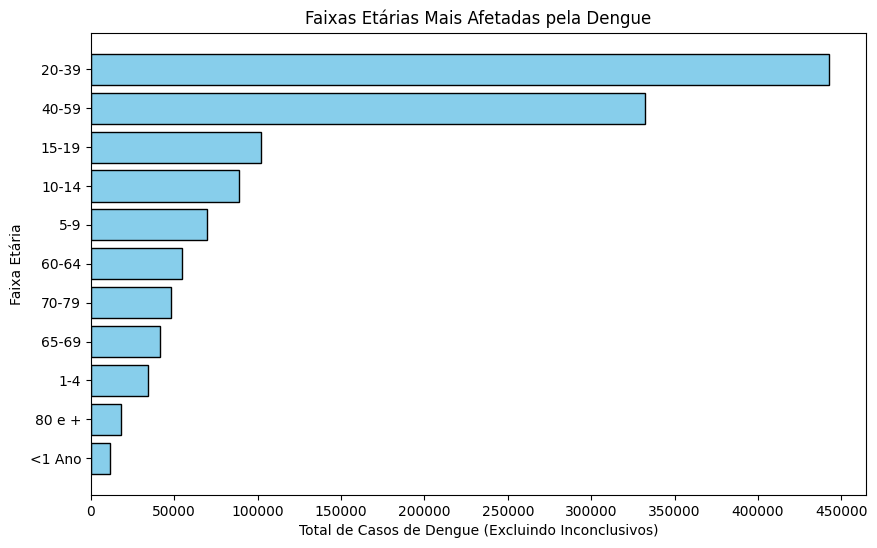

In [ ]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.barh(df_concatenado_afetados_faixa["Faixa Etária"], df_concatenado_afetados_faixa["Total sem Inconclusivo"], color='skyblue')
plt.xlabel('Total de Casos de Dengue (Excluindo Inconclusivos)')
plt.ylabel('Faixa Etária')
plt.title('Faixas Etárias Mais Afetadas pela Dengue')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a faixa etária com mais casos no topo
plt.xticks(range(0, int(df_concatenado_afetados_faixa["Total sem Inconclusivo"].max()) + 50000, 50000))
plt.show()

#Importando dados do Sorotipo

Para responder a segunda parte da pergunta usaremos duas variáveis que é o Sorotipo da dengue e a faixa etária.

In [ ]:
colunas = ["Faixa Etária","Ign/Branco","DEN 1","DEN 2","DEN 3","DEN 4","Total"]
df22sorotipo = pd.read_csv('/content/sorotipo_faixaetaria2022.csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df23sorotipo = pd.read_csv('/content/sorotipo_faixaetaria2023.csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
df24sorotipo = pd.read_csv('/content/sorotipo_faixaetaria2024.csv', sep=';', skiprows=3, quotechar='"', encoding='latin1', usecols=colunas)
dataframesorotipo = [df22sorotipo, df23sorotipo, df24sorotipo]
df_concatenado_sorotipo_faixa = pd.concat(dataframesorotipo, ignore_index=True)
df_concatenado_sorotipo_faixa = df_concatenado_sorotipo_faixa.iloc[:12]

df_concatenado_sorotipo_faixa['Total sem Ign/Branco'] = df_concatenado_sorotipo_faixa['Total'] - df_concatenado_sorotipo_faixa['Ign/Branco']
indice_linha = df_concatenado_sorotipo_faixa[df_concatenado_sorotipo_faixa['Faixa Etária'] == 'Em branco/IGN'].index
df_concatenado_sorotipo_faixa.drop(indice_linha, inplace=True)
df_concatenado_sorotipo_faixa.drop(columns=['Ign/Branco'], inplace=True)
print(df_concatenado_sorotipo_faixa)

   Faixa Etária   DEN 1 DEN 2 DEN 3 DEN 4     Total  Total sem Ign/Branco
1        <1 Ano   163.0    22     -     -   13843.0                 185.0
2           1-4   346.0    52     -     3   40431.0                 401.0
3           5-9   975.0   190     -     2   79507.0                1167.0
4         10-14  1528.0   285     -     -   99786.0                1813.0
5         15-19  1683.0   255     -     -  114563.0                1938.0
6         20-39  6243.0   852     3     7  498773.0                7105.0
7         40-59  4767.0   574     1     5  368661.0                5347.0
8         60-64   826.0   105     -     1   60049.0                 932.0
9         65-69   634.0    58     -     -   45247.0                 692.0
10        70-79   742.0    57     -     1   52650.0                 800.0
11       80 e +   270.0    23     -     -   19816.0                 293.0


#Tratando os dados do Sorotipo para as 5 Faixas Etárias mais afetadas


Após limpar a base de dados, pegaremos as 5 idades mais afetadas por dengue e analisaremos qual é o tipo de sorotipo que elas mais contrairam.

In [ ]:
#Pega as 5 faixas mais afetadas
top_faixas = df_concatenado_afetados_faixa["Faixa Etária"].head(5).values

#Faz um novo dataframe para comparar as idades mais afetadas com os sorotipos de dengue
df_comparacao = df_concatenado_sorotipo_faixa[df_concatenado_sorotipo_faixa["Faixa Etária"].isin(top_faixas)]
df_comparacao = df_comparacao.sort_values(by="Total sem Ign/Branco", ascending=False)
print(df_comparacao)

  Faixa Etária   DEN 1 DEN 2 DEN 3 DEN 4     Total  Total sem Ign/Branco
6        20-39  6243.0   852     3     7  498773.0                7105.0
7        40-59  4767.0   574     1     5  368661.0                5347.0
5        15-19  1683.0   255     -     -  114563.0                1938.0
4        10-14  1528.0   285     -     -   99786.0                1813.0
3          5-9   975.0   190     -     2   79507.0                1167.0


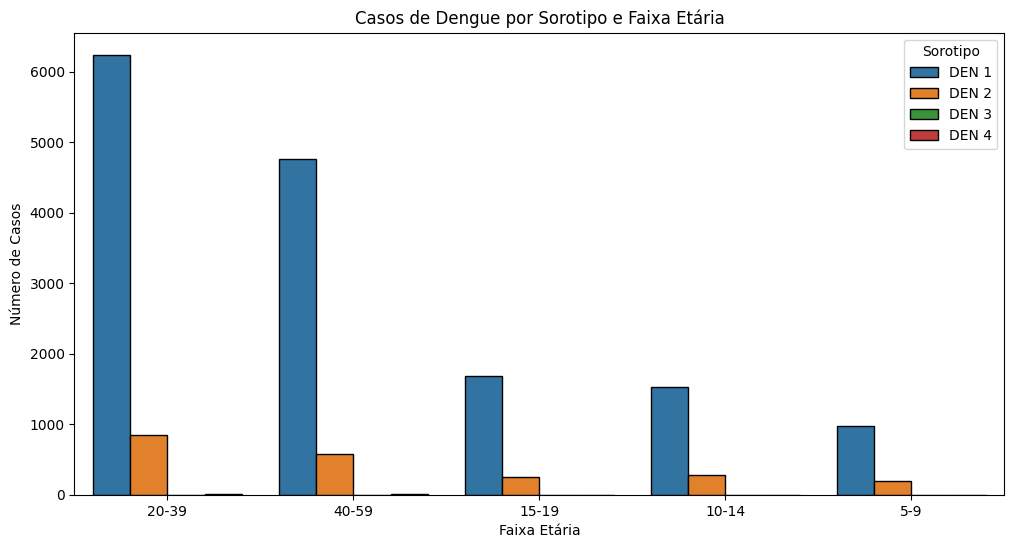

In [ ]:
# Transformando o dataframe para formato longo
df_long = df_comparacao.melt(id_vars="Faixa Etária", value_vars=["DEN 1", "DEN 2", "DEN 3", "DEN 4"],
                              var_name="Sorotipo", value_name="Casos")
df_long['Casos'] = df_long['Casos'].replace('-', 0).astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Faixa Etária", y="Casos", hue="Sorotipo")
plt.title("Casos de Dengue por Sorotipo e Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Casos")
plt.legend(title="Sorotipo")
plt.show()

Podemos perceber que como houve pequenos casos dos sorotipos 3 e 4, eles quase não aparecem na comparação. A partir da análise dos gráficos, temos que o sorotipo mais contraído pelas faixas etárias mais afetadas foi o tipo 1.


#Cálculo do intervalo de confiança para cada Faixa Etária

Faixa Etária: 20-39 | Proporção: 0.3561 | Intervalo: (0.3553, 0.3569)
Faixa Etária: 40-59 | Proporção: 0.2673 | Intervalo: (0.2665, 0.2681)
Faixa Etária: 15-19 | Proporção: 0.0819 | Intervalo: (0.0814, 0.0823)
Faixa Etária: 10-14 | Proporção: 0.0715 | Intervalo: (0.0710, 0.0719)
Faixa Etária: 5-9 | Proporção: 0.0560 | Intervalo: (0.0556, 0.0564)
Faixa Etária: 60-64 | Proporção: 0.0440 | Intervalo: (0.0436, 0.0444)
Faixa Etária: 70-79 | Proporção: 0.0387 | Intervalo: (0.0384, 0.0390)
Faixa Etária: 65-69 | Proporção: 0.0333 | Intervalo: (0.0330, 0.0336)
Faixa Etária: 1-4 | Proporção: 0.0276 | Intervalo: (0.0273, 0.0279)
Faixa Etária: 80 e + | Proporção: 0.0144 | Intervalo: (0.0142, 0.0146)
Faixa Etária: <1 Ano | Proporção: 0.0092 | Intervalo: (0.0090, 0.0094)


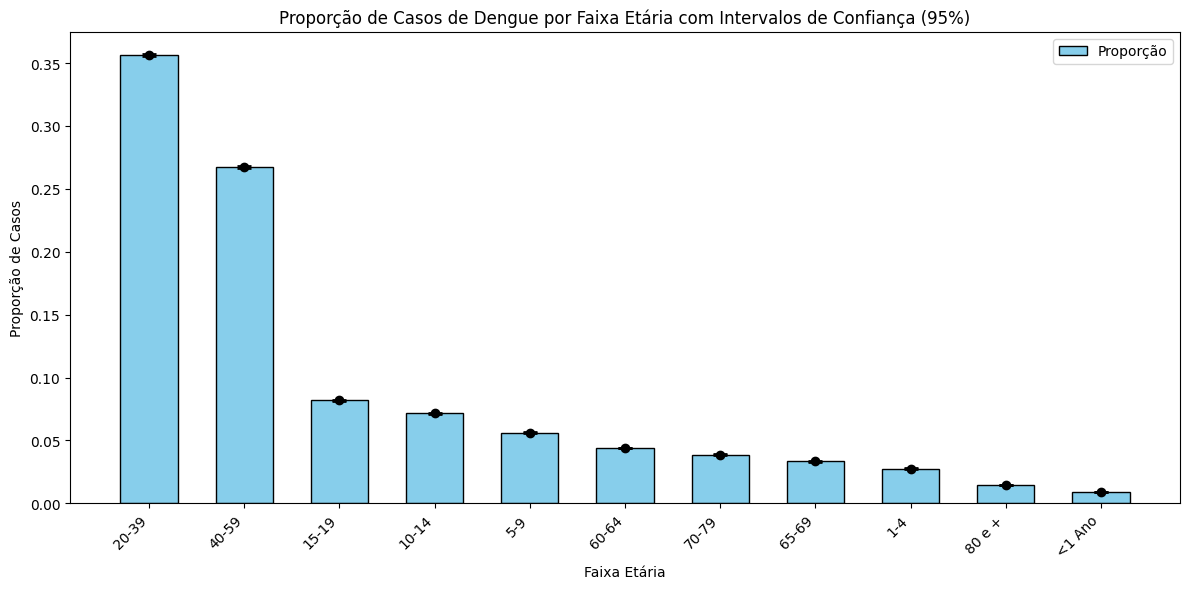

In [ ]:
# Função para calcular o intervalo de confiança para uma proporção
def calcular_intervalo_confianca_proporcao(p, n, confianca=0.95):
    z = stats.norm.ppf(1 - (1 - confianca) / 2)
    erro = z * np.sqrt((p * (1 - p)) / n)
    return p - erro, p + erro

total_geral = df_concatenado_afetados_faixa["Total sem Inconclusivo"].sum()
faixas_etarias = df_concatenado_afetados_faixa["Faixa Etária"]
total_casos = df_concatenado_afetados_faixa["Total sem Inconclusivo"]
proporcoes = total_casos / total_geral
intervalos = [calcular_intervalo_confianca_proporcao(p, total_geral) for p in proporcoes]
intervalos_inf = [i[0] for i in intervalos]
intervalos_sup = [i[1] for i in intervalos]
for faixa, proporcao, inf, sup in zip(faixas_etarias, proporcoes, intervalos_inf, intervalos_sup):
    print(f"Faixa Etária: {faixa} | Proporção: {proporcao:.4f} | Intervalo: ({inf:.4f}, {sup:.4f})")

plt.figure(figsize=(12, 6))
bar_width = 0.6
bars = plt.bar(faixas_etarias, proporcoes, bar_width, color='skyblue', label='Proporção')
plt.errorbar(faixas_etarias, proporcoes,
             yerr=[np.array(proporcoes) - np.array(intervalos_inf), np.array(intervalos_sup) - np.array(proporcoes)],
             fmt='o', color='black', capsize=5, capthick=2, elinewidth=1)
for i in range(len(faixas_etarias)):
    plt.plot([i, i], [intervalos_inf[i], intervalos_sup[i]], color='red', linestyle='-', linewidth=1.5)
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Casos')
plt.title('Proporção de Casos de Dengue por Faixa Etária com Intervalos de Confiança (95%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

#Conclusão Intervalo de Confiança

Ajuda a entender a importância relativa de cada faixa etária em relação ao total de casos, destacando a fração que cada faixa etária representa do total. Em comparação com o gráfico da contagem absoluta dos casos, que é útil para visualizar quais faixas etárias têm mais casos absolutos, mas pode não refletir a representatividade proporcional se a distribuição de casos for desigual, o gráfico de proporções é ideal para analisar a representatividade relativa e entender a variabilidade nas estimativas.

# **2º Pergunta: Por que 2024 teve um aumento nos casos de dengue em relação aos anos anteriores? É possível relacionar com o índice pluviométrico?**

Para responder a essa pergunta vamos pegar os dados pluviométricos dos anos:  2022, 2023 e 2024.

# Importando dados de chuva
Fonte: adaptado de INMET (dados de estações processados)

Os dados foram processados a partir de dados de estações meteorológicas. Alguns estados não possuíram índices de chuva para todos os meses, portanto, foram descartados da análise.

Para o ano de 2022, foram descartados diversos estados.

Também foi descartado da análise o estado do Espírito Santo, pois os dados referentes à dengue não foram contemplados na base de dados adquirida.

In [ ]:
estados_sem_dados = ['ro','rr','al','se']
estados_sem_dados2022 = ['ac','ap','pe','pi','rn','mt']

chuvas_2022 = pd.read_csv('/content/chuvas_2022.csv', sep=';', index_col=0)
chuvas_2022 = chuvas_2022.drop(estados_sem_dados+estados_sem_dados2022+['es'])

chuvas_2023 = pd.read_csv('/content/chuvas_2023.csv', sep=';', index_col=0)
chuvas_2023 = chuvas_2023.drop(estados_sem_dados+['es'])

chuvas_2024 = pd.read_csv('/content/chuvas_2024.csv', sep=';', index_col=0)
chuvas_2024 = chuvas_2024.drop(estados_sem_dados+['es'])

chuvas_2024.head()

,jan,fev,mar,abr
ac,263.9,369.0,231.5,265.6
am,269.1,292.3,325.1,273.1
ap,336.7,270.0,335.9,316.9
pa,296.9,292.7,411.6,365.9
to,343.7,245.4,238.7,152.5


# Importando dados de notificações de dengue por mês
Fonte: TABNET DATASUS

Os dados foram coletados com base no número de ocorrências por mês em cada estado brasileiro. Com isso, não foi possível diferenciar ocorrências em que houve realmente dengue ou não. Apesar disso, julgamos ser coerente utilizar estes dados para analisar a correlação entre a dangue e a chuva.

Foram retirados do dataframe os mesmos estados dos dados de chuva.

Além disso, para o ano de 2024, foram considerados apenas os meses de janeiro a abril, para compatibilização dos dataframes.

In [ ]:
uf_conversor = {'11 Rondônia': 'ro',
                '12 Acre': 'ac',
                '13 Amazonas': 'am',
                '14 Roraima': 'rr',
                '15 Pará': 'pa',
                '16 Amapá':'ap',
                '17 Tocantins': 'to',
                '21 Maranhão': 'ma',
                '22 Piauí': 'pi',
                '23 Ceará': 'ce',
                '24 Rio Grande do Norte': 'rn',
                '25 Paraíba': 'pb',
                '26 Pernambuco': 'pe',
                '27 Alagoas': 'al',
                '28 Sergipe': 'se',
                '29 Bahia': 'ba',
                '31 Minas Gerais': 'mg',
                '33 Rio de Janeiro': 'rj',
                '35 São Paulo': 'sp',
                '41 Paraná': 'pr',
                '42 Santa Catarina': 'sc',
                '43 Rio Grande do Sul': 'rs',
                '50 Mato Grosso do Sul': 'ms',
                '51 Mato Grosso': 'mt',
                '52 Goiás': 'go',
                '53 Distrito Federal': 'df'}

dengue_mes_2022 = pd.read_csv('/content/dengue_ufxmes2022.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2022.columns = dengue_mes_2022.columns.str.lower()
dengue_mes_2022 = dengue_mes_2022.drop(columns=['total'])
dengue_mes_2022 = dengue_mes_2022.drop(index=estados_sem_dados+estados_sem_dados2022)

dengue_mes_2023 = pd.read_csv('/content/dengue_ufxmes2023.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2023.columns = dengue_mes_2023.columns.str.lower()
dengue_mes_2023 = dengue_mes_2023.drop(columns=['total'])
dengue_mes_2023 = dengue_mes_2023.drop(index=estados_sem_dados)

dengue_mes_2024 = pd.read_csv('/content/dengue_ufxmes2024.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2024.columns = dengue_mes_2024.columns.str.lower()
dengue_mes_2024 = dengue_mes_2024.drop(columns=['mai','jun','dez','total'])
dengue_mes_2024 = dengue_mes_2024.drop(index=estados_sem_dados)
dengue_mes_2022

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
UF de notificação,,,,,,,,,,,,
am,228,404,579,458,387,262,203,165,430,973,627,640
pa,895,908,904,703,704,391,276,174,157,183,276,341
to,4081,3747,2935,3132,2893,1587,744,453,250,209,355,460
ma,154,370,918,975,1325,955,682,443,318,270,250,190
ce,360,979,2773,5893,10776,9347,4765,3821,1853,885,764,521
pb,502,1109,2582,3754,6236,5183,3998,2458,1514,716,496,291
ba,1293,2507,5957,7965,7587,3313,1710,1391,858,968,978,1197
mg,2476,3811,13045,24524,23054,7831,2925,1618,1280,1561,2271,4645
rj,70,231,916,1695,3085,1775,924,624,379,454,458,527


A próxima etapa é analisar proporcionalmente o número de ocorrências, relacionando o número de ocorrências pelo número de habitantes em cada estado.

Fonte: IBGE (censo 2022)

Apesar de não ser verdade, considerou-se para este estudo que a população de 2022 é representativa para 2023 e 2024. Isso pode ser feito devido à ordem de grandeza da população em comparação com as ocorrências de dengue. Além disso, o intervalo de tempo é relativamente pequeno.

In [ ]:
pop = pd.read_csv('/content/pop2022.csv', sep=';', index_col=0)

dengue_mes_2022_rel = dengue_mes_2022.div(pop['pop'], axis=0).drop(index=['es']) * 100
dengue_mes_2023_rel = dengue_mes_2023.div(pop['pop'], axis=0).drop(index=['es']) * 100
dengue_mes_2024_rel = dengue_mes_2024.div(pop['pop'], axis=0).drop(index=['es']) * 100
dengue_mes_2024_rel.head()

,jan,fev,mar,abr
ac,0.276139,0.108672,0.077227,0.081926
am,0.051679,0.060305,0.050512,0.022909
ap,0.096626,0.307867,0.259213,0.155092
ba,0.029021,0.193747,0.511207,0.540525
ce,0.004298,0.011484,0.021728,0.042468


# Explorando os dados
A partir dos dados ajustados, é possível observar a evolução da dengue ao longo dos anos

<Axes: title={'center': '2024'}>

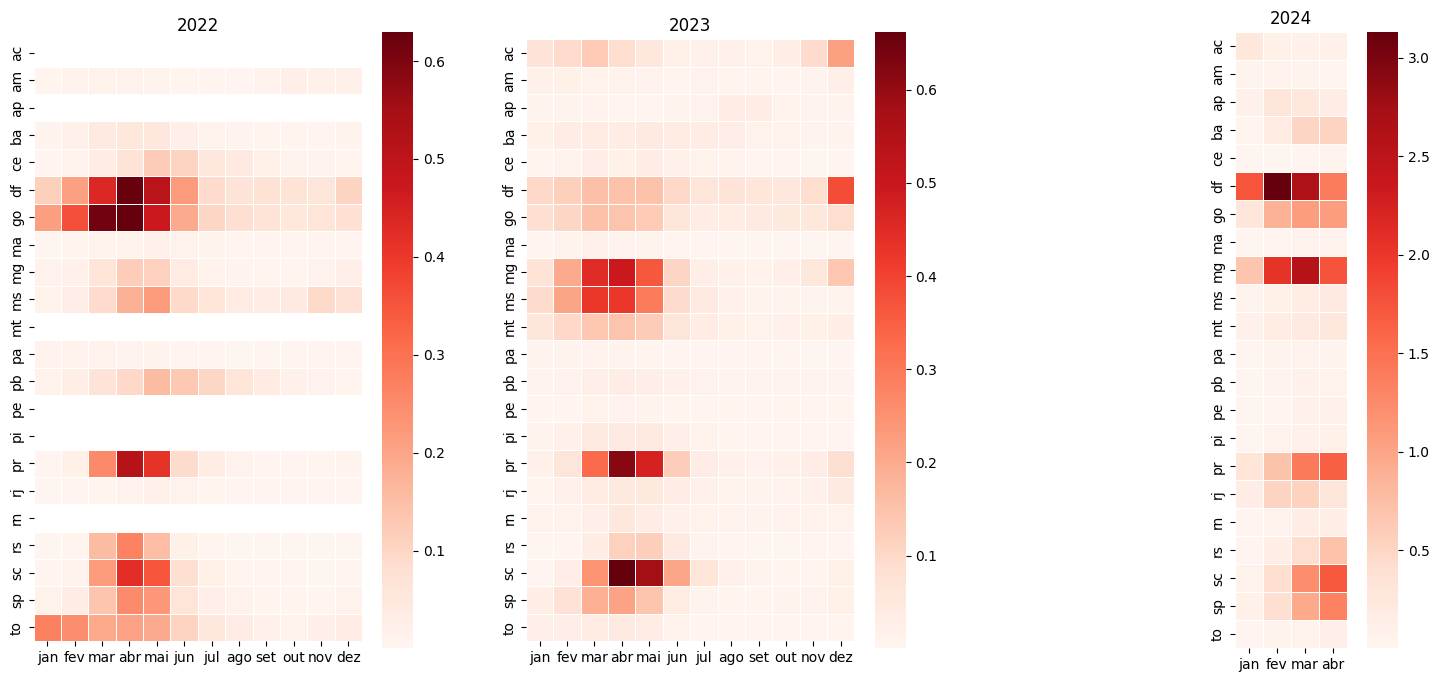

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

axes[0].set_title('2022')
sns.heatmap(dengue_mes_2022_rel, square=True, linewidths=.5, cmap='Reds', ax=axes[0])

axes[1].set_title('2023')
sns.heatmap(dengue_mes_2023_rel, square=True, linewidths=.5, cmap='Reds', ax=axes[1])

axes[2].set_title('2024')
sns.heatmap(dengue_mes_2024_rel, square=True, linewidths=.5, cmap='Reds', ax=axes[2])

Para se ter dimensão do aumento dos casos de dengue em 2024, vamos plotar os gráficos na mesma escala

Observa-se que o Distrito Federal e Minas Gerais possuem uma maior incidência relativa de dengue

<Axes: title={'center': '2024'}>

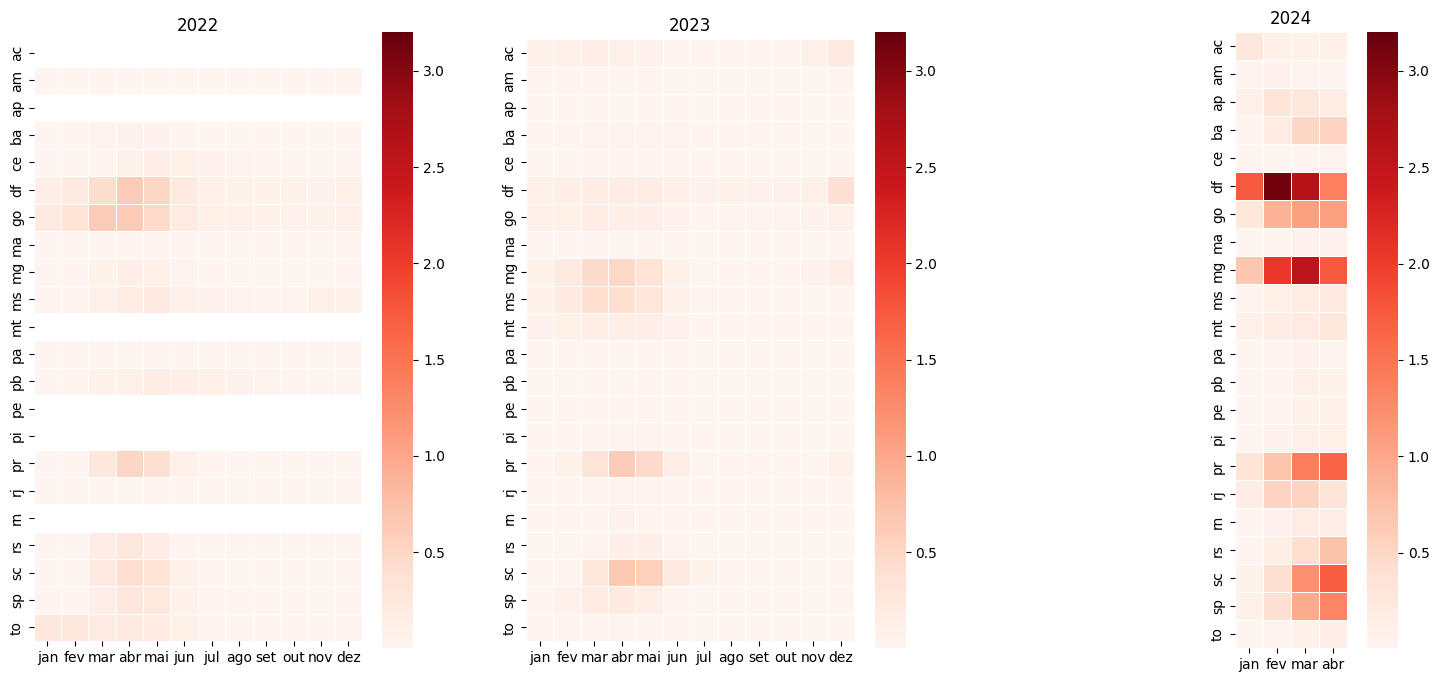

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# plots com escala igual
axes[0].set_title('2022')
sns.heatmap(dengue_mes_2022_rel, square=True, linewidths=.5, cmap='Reds', vmax=3.2, ax=axes[0])

axes[1].set_title('2023')
sns.heatmap(dengue_mes_2023_rel, square=True, linewidths=.5, cmap='Reds', vmax=3.2, ax=axes[1])

axes[2].set_title('2024')
sns.heatmap(dengue_mes_2024_rel, square=True, linewidths=.5, cmap='Reds', vmax=3.2, ax=axes[2])

# Avaliando a hipótese da chuva
Os gráficos a seguir mostram um comparativo entre as ocorrências de dengue com o índice pluviométrico nas mesmas épocas.

## Ano: 2022

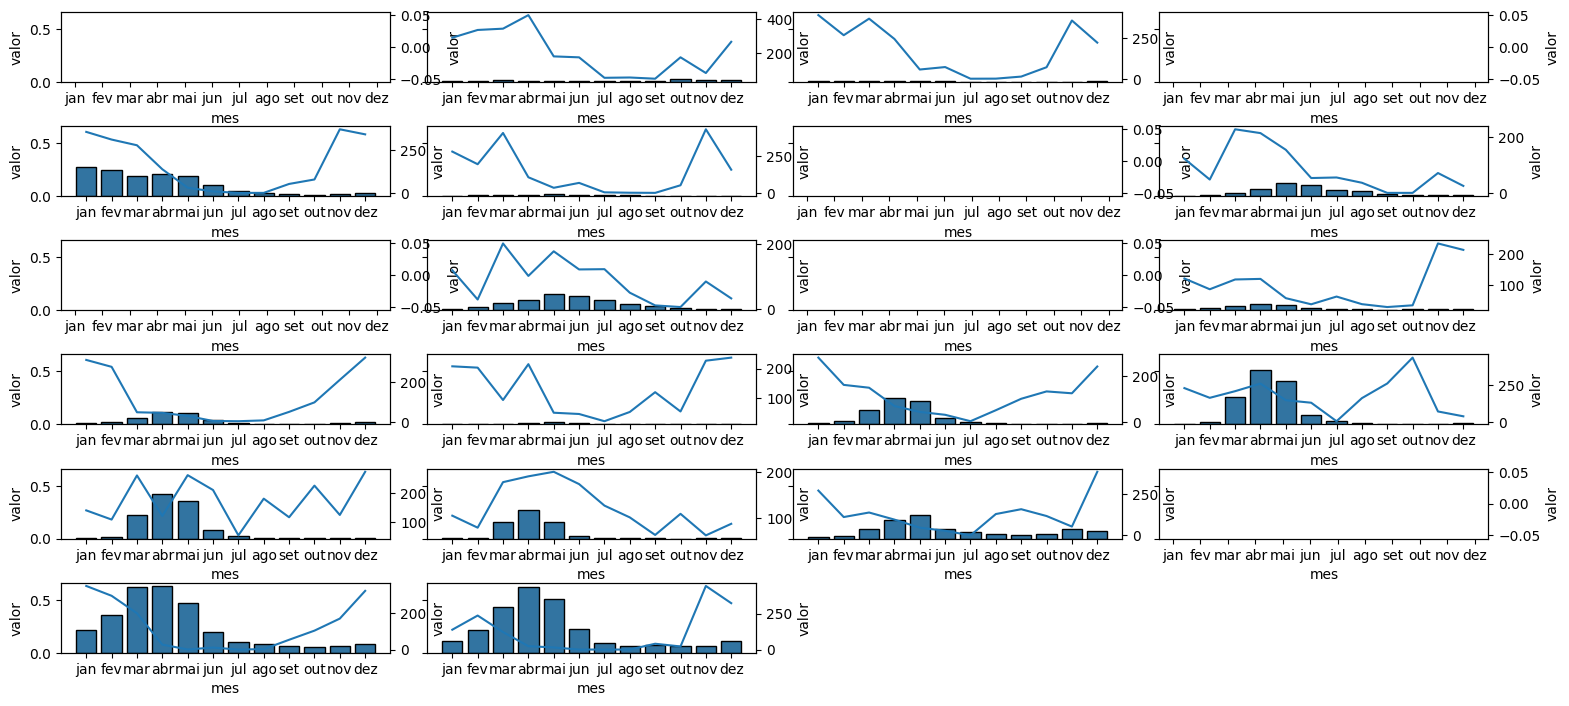

In [ ]:
dengue_chuva2022 = pd.concat([dengue_mes_2022_rel.assign(tipo='dengue'), chuvas_2022.assign(tipo='chuva')]).reset_index().rename(columns={'index':'uf'})
dengue_chuva2022 = pd.melt(dengue_chuva2022, id_vars=['uf','tipo'], var_name='mes', value_name='valor')

fig, axes = plt.subplots(nrows=6, ncols=4, sharey=True, figsize=(15, 7))
fig.tight_layout()
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

ufs = list(uf_conversor.values())
ufs = [x for x in ufs if x not in estados_sem_dados+['es']]

for uf, ax in zip(ufs,axes[:-2]):
    df = dengue_chuva2022
    sns.barplot(df[(df['tipo']=='dengue') & (df['uf'] == uf)], x='mes', y='valor', ax=ax, errorbar=None)
    ax2 = ax.twinx()
    sns.lineplot(df[(df['tipo']=='chuva') & (df['uf'] == uf)], x='mes', y='valor', ax=ax2)

## Ano: 2023

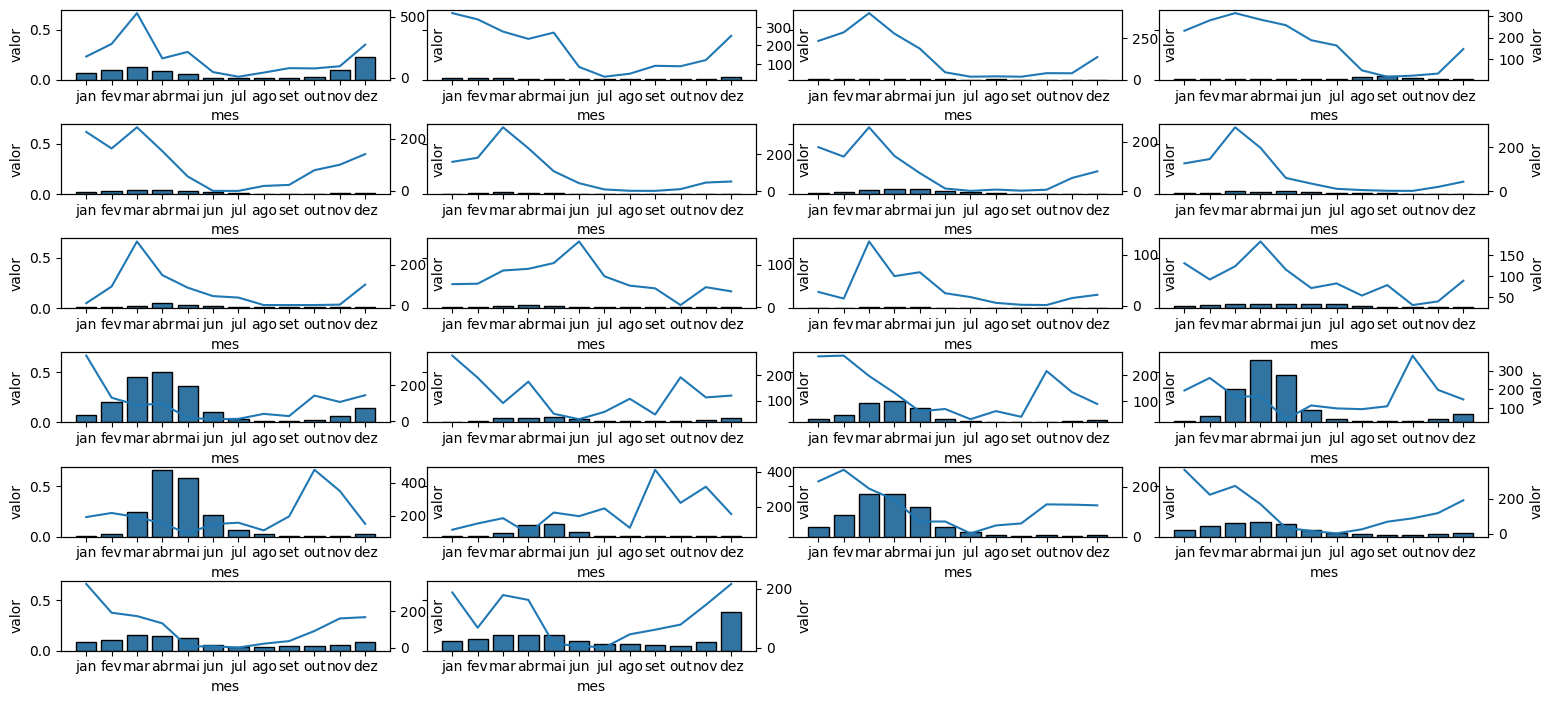

In [ ]:
dengue_chuva2023 = pd.concat([dengue_mes_2023_rel.assign(tipo='dengue'), chuvas_2023.assign(tipo='chuva')]).reset_index().rename(columns={'index':'uf'})
dengue_chuva2023 = pd.melt(dengue_chuva2023, id_vars=['uf','tipo'], var_name='mes', value_name='valor')

fig, axes = plt.subplots(nrows=6, ncols=4, sharey=True, figsize=(15, 7))
fig.tight_layout()
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

for uf, ax in zip(ufs,axes[:-2]):
    df = dengue_chuva2023
    sns.barplot(df[(df['tipo']=='dengue') & (df['uf'] == uf)], x='mes', y='valor', ax=ax, errorbar=None)
    ax2 = ax.twinx()
    sns.lineplot(df[(df['tipo']=='chuva') & (df['uf'] == uf)], x='mes', y='valor', ax=ax2)

## Ano: 2024

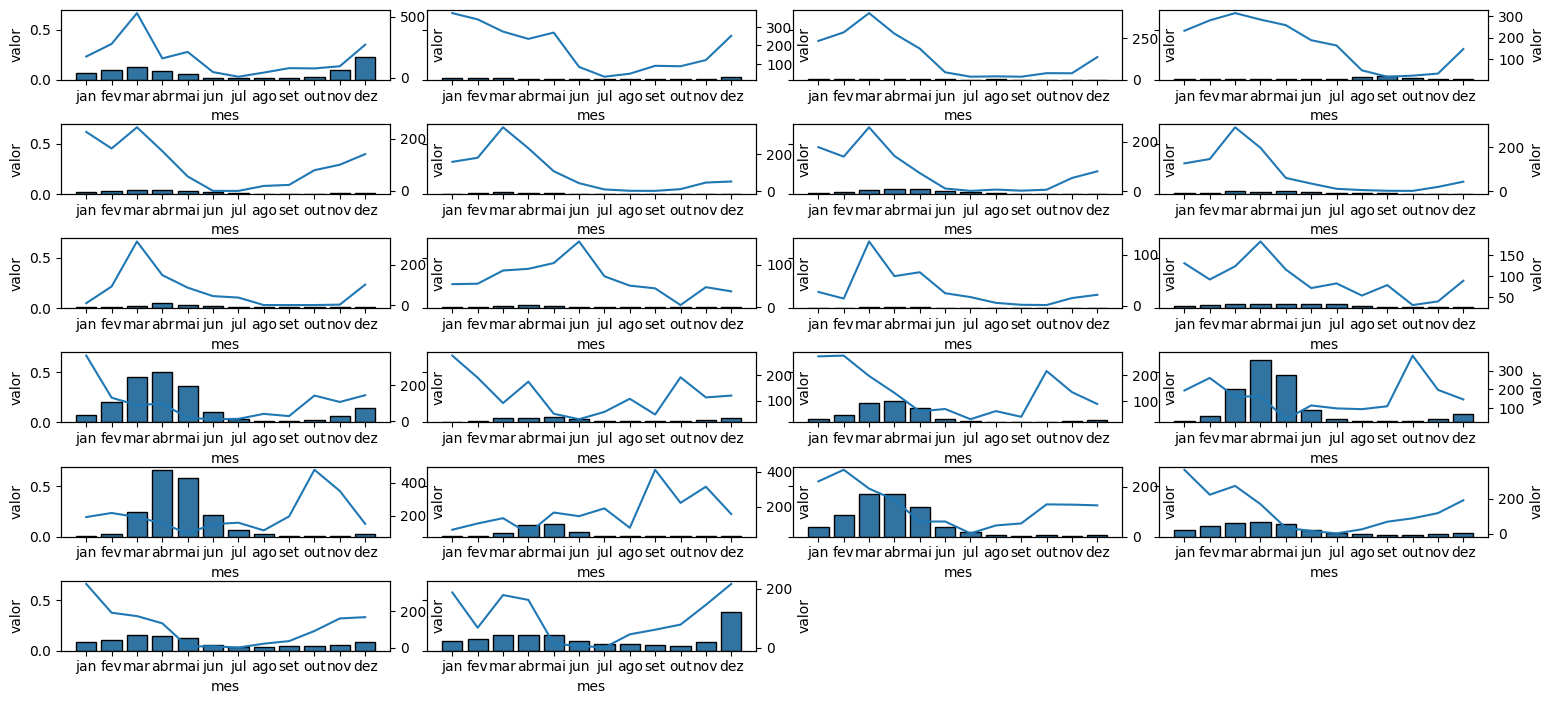

In [ ]:
dengue_chuva2023 = pd.concat([dengue_mes_2023_rel.assign(tipo='dengue'), chuvas_2023.assign(tipo='chuva')]).reset_index().rename(columns={'index':'uf'})
dengue_chuva2023 = pd.melt(dengue_chuva2023, id_vars=['uf','tipo'], var_name='mes', value_name='valor')

fig, axes = plt.subplots(nrows=6, ncols=4, sharey=True, figsize=(15, 7))
fig.tight_layout()
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

for uf, ax in zip(ufs,axes[:-2]):
    df = dengue_chuva2023
    sns.barplot(df[(df['tipo']=='dengue') & (df['uf'] == uf)], x='mes', y='valor', ax=ax, errorbar=None)
    ax2 = ax.twinx()
    sns.lineplot(df[(df['tipo']=='chuva') & (df['uf'] == uf)], x='mes', y='valor', ax=ax2)

Observa-se um padrão em que os casos de dengue são mais acentuados por volta do mês de abril. Na maioria dos gráficos, evidencia-se que há um período de chuvas mais volumoso por volta deste mês, entretanto, isso não é regra para todos.



# Organizando dados para regressão

In [ ]:
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
meses_map = {item: idx for idx, item in enumerate(meses)}

chuvas_raw = pd.read_csv('/content/precipitacao_2022_a_2024.csv', sep=';', index_col=0)
chuvas_media = chuvas_raw.groupby(['uf', 'mes', 'ano'])['precipitacao'].mean().reset_index()

dengue_mes_2022 = pd.read_csv('/content/dengue_ufxmes2022.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2022.columns = dengue_mes_2022.columns.str.lower()
dengue_mes_2022 = dengue_mes_2022.drop(['total'], axis=1)
dengue_mes_2022 = (dengue_mes_2022.div(pop['pop'], axis=0) * 100)
dengue_mes_2022 = dengue_mes_2022.dropna()
dengue_mes_2022 = dengue_mes_2022.reset_index().rename(columns={'index':'uf'})
dengue_mes_2022 = dengue_mes_2022.melt(id_vars=['uf'], value_vars=meses, var_name='mes', value_name='casos')
dengue_mes_2022['ano'] = 2022

dengue_mes_2023 = pd.read_csv('/content/dengue_ufxmes2023.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2023.columns = dengue_mes_2023.columns.str.lower()
dengue_mes_2023 = dengue_mes_2023.drop(['total'], axis=1)
dengue_mes_2023 = (dengue_mes_2023.div(pop['pop'], axis=0) * 100)
dengue_mes_2023 = dengue_mes_2023.dropna()
dengue_mes_2023 = dengue_mes_2023.reset_index().rename(columns={'index':'uf'})
dengue_mes_2023 = dengue_mes_2023.melt(id_vars=['uf'], value_vars=meses, var_name='mes', value_name='casos')
dengue_mes_2023['ano'] = 2023

dengue_mes_2024 = pd.read_csv('/content/dengue_ufxmes2024.csv', sep=';', index_col=0).rename(index=uf_conversor)
dengue_mes_2024.columns = dengue_mes_2024.columns.str.lower()
dengue_mes_2024 = dengue_mes_2024.drop(['dez', 'total'], axis=1)
dengue_mes_2024 = dengue_mes_2024.div(pop['pop'], axis=0) * 100
dengue_mes_2024 = dengue_mes_2024.dropna()
dengue_mes_2024 = dengue_mes_2024.reset_index().rename(columns={'index':'uf'})
dengue_mes_2024 = dengue_mes_2024.melt(id_vars=['uf'], value_vars=meses[0:6], var_name='mes', value_name='casos')
dengue_mes_2024['ano'] = 2024

dengue_mes = pd.concat([dengue_mes_2022, dengue_mes_2023, dengue_mes_2024])

chuva_dengue = pd.merge(chuvas_media, dengue_mes, how='inner', on=['uf','mes','ano'])
chuva_dengue['mes'] = chuva_dengue['mes'].map(lambda x: meses_map[x]+1)
chuva_dengue.head()

,uf,mes,ano,precipitacao,casos
0,ac,4,2022,218.4,0.043011
1,ac,4,2023,168.1,0.089637
2,ac,4,2024,215.9,0.081926
3,ac,8,2022,32.2,0.010964
4,ac,8,2023,43.2,0.017831


# Observando gráficos chuva x casos de dengue para cada estado

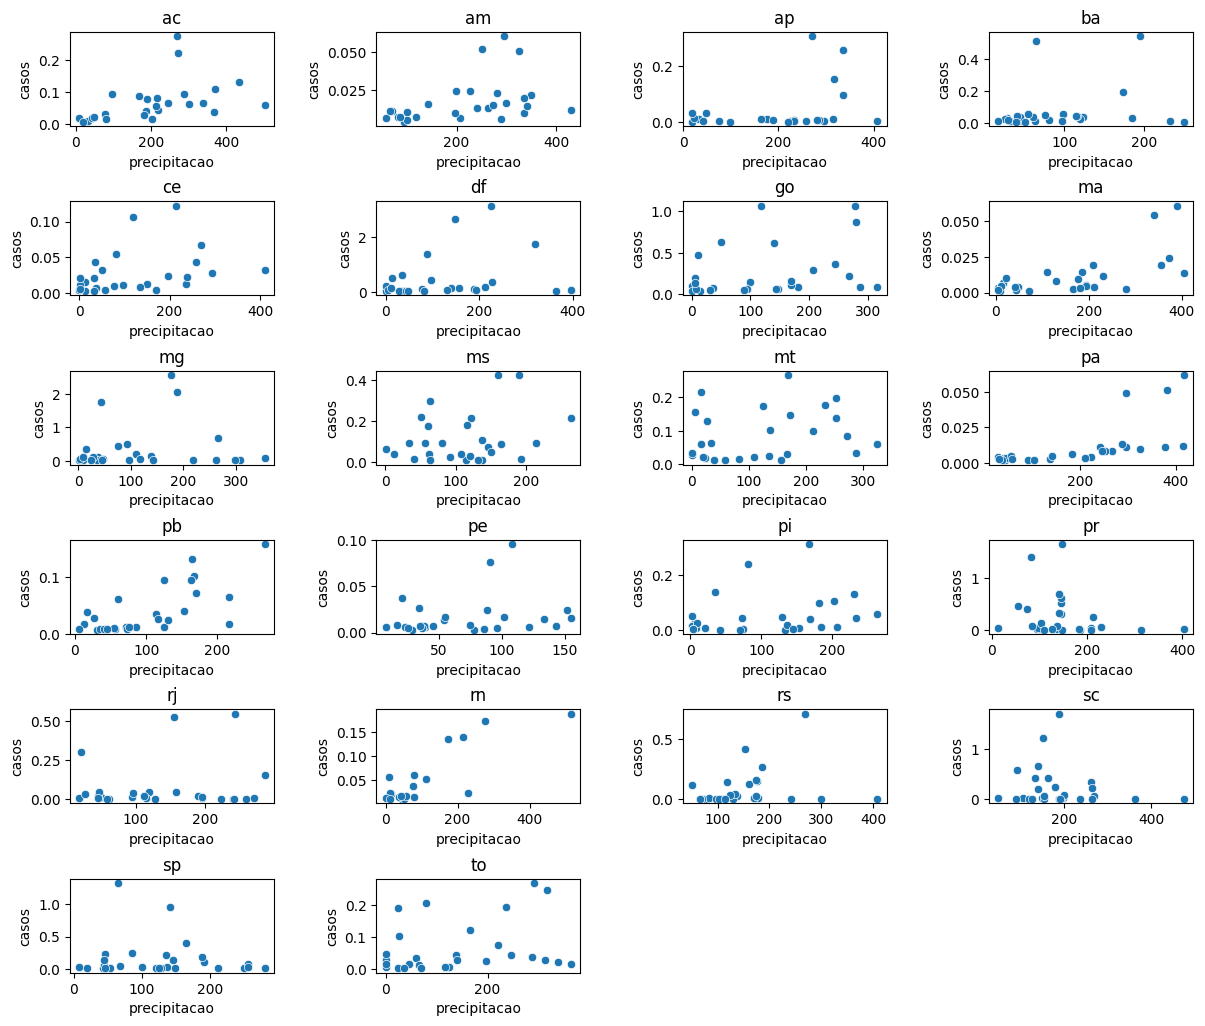

In [ ]:
reg_ufs = chuva_dengue.uf.unique()
reg_ufs

fig, axes = plt.subplots(nrows=6, ncols=4, sharey=False, figsize=(12, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

for uf, ax in zip(reg_ufs,axes[:-2]):
    df = chuva_dengue[chuva_dengue['uf'] == uf]
    sns.scatterplot(data=df, x='precipitacao', y='casos', ax=ax).set_title(uf)

# Processando dados para a regressão

In [ ]:
chuva_dengue_dummies = pd.get_dummies(chuva_dengue, columns=['uf'])

from sklearn.model_selection import train_test_split
train_df2, test_df2 = train_test_split(chuva_dengue_dummies, test_size=0.2)

y_train_df2 = train_df2['casos']
x_train_df2 = train_df2.drop(['casos'], axis='columns')

from sklearn.preprocessing import StandardScaler
scaler_x2 = StandardScaler()
scaler_y2 = StandardScaler()

x_train2 = scaler_x2.fit_transform(x_train_df2.values)
y_train2 = scaler_y2.fit_transform(y_train_df2.values[:, np.newaxis])

# Criando o modelo de regressão

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso2 = GridSearchCV(Lasso(),cv=3,refit=True,param_grid={'alpha':[0.001,0.01,0.1,1,10,100,100]})

lasso2.fit(x_train2,y_train2)
lasso2.score(x_train2,y_train2)

0.27199342448329034

# Avaliando o erro do modelo

MSE: 0.728


Text(0.5, 1.0, '(0.3972756413407165,1.1440378348615579)')

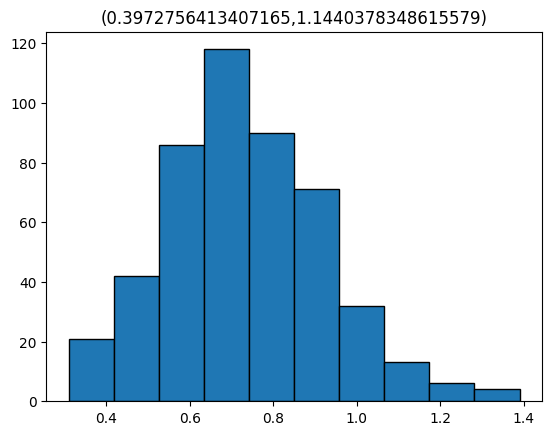

In [ ]:
from sklearn.metrics import mean_squared_error
from scipy import stats as ss
y_pred = lasso2.predict(x_train2)
print('MSE: {:.3f}'.format(mean_squared_error(y_train2, y_pred)))

def bootstrap_score(x, y, model, n=10000):
  size = len(y)
  samples = np.zeros(size)
  for i in range(size):
    idx = np.random.choice(size, size)
    xb = x[idx]
    yb = y[idx]
    err = mean_squared_error(yb, model.predict(xb))
    samples[i] = err
  return samples

samples = bootstrap_score(x_train2, y_train2, lasso2)
plt.hist(samples, edgecolor='k')
plt.title('({},{})'.format(ss.scoreatpercentile(samples, 2.5),
                           ss.scoreatpercentile(samples, 97.5)))

Validando o modelo com a amostra de teste

Text(0.5, 1.0, '(0.3372970358920173,4.104812438008067)')

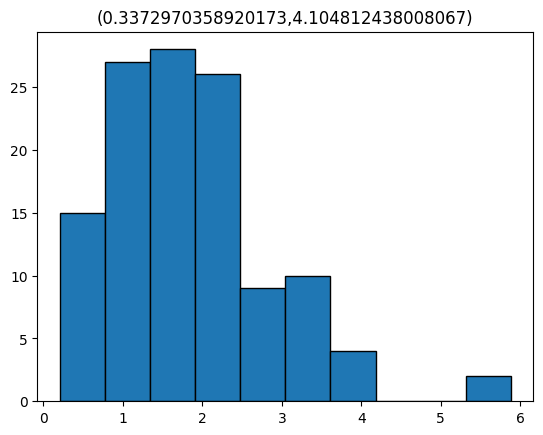

In [ ]:
y_test_df2 = test_df2['casos']
x_test_df2 = test_df2.drop('casos', axis='columns')

x_test2 = scaler_x2.transform(x_test_df2.values)
y_test2 = scaler_y2.transform(y_test_df2.values[:, np.newaxis])

samples = bootstrap_score(x_test2, y_test2, lasso2)
plt.hist(samples, edgecolor='k')
plt.title('({},{})'.format(ss.scoreatpercentile(samples, 2.5),
                           ss.scoreatpercentile(samples, 97.5)))

Pelo IC do MSE encontrado, pode-se dizer que o modelo atual não é adequado para previsão de casos de dengue.

# **3º Pergunta: Qual a taxa de óbitos de cada região (em relação à quantidade de casos)? É possível relacionar essa taxa com o investimento realizado pelo governo na saúde de cada região?**

Para responder a essa pergunta vamos pegar os dados sobre:
- A quantidade de casos de cada região
- A quantidade de óbitos de cada região.
- Dados sobre repasse de valores de cada região.


In [ ]:
# Quantidade de casos por região
dados_dengue_regiao24 = pd.read_csv('/content/dengue_por_regiao_2024.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
dados_dengue_regiao24.head(6)

,Região de notificação,Ign/Branco,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave,Total
0,1 Região Norte,2925.0,11604.0,34406.0,601.0,67.0,49603.0
1,2 Região Nordeste,23123.0,94022.0,212382.0,7956.0,824.0,338307.0
2,3 Região Sudeste,90598.0,726769.0,3174325.0,42246.0,4129.0,4038067.0
3,4 Região Sul,25935.0,160255.0,996846.0,20711.0,1431.0,1205178.0
4,5 Região Centro-Oeste,12648.0,131829.0,484616.0,19754.0,1231.0,650078.0
5,Total,155229.0,1124479.0,4902575.0,91268.0,7682.0,6281233.0


In [ ]:
colunas_dengue = ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']

# Filtrar apenas as regiões de interesse
regioes_interesse = ['1 Região Norte', '2 Região Nordeste', '3 Região Sudeste', '4 Região Sul', '5 Região Centro-Oeste']
dados_dengue_filtrados = dados_dengue_regiao24[dados_dengue_regiao24['Região de notificação'].isin(regioes_interesse)].copy()

# Somar o total de casos para cada região
dados_dengue_filtrados.loc[:, 'Total de casos'] = dados_dengue_filtrados[colunas_dengue].sum(axis=1)

# Exibir o resultado
print(dados_dengue_filtrados[['Região de notificação', 'Total de casos']])

   Região de notificação  Total de casos
0         1 Região Norte         35074.0
1      2 Região Nordeste        221162.0
2       3 Região Sudeste       3220700.0
3           4 Região Sul       1018988.0
4  5 Região Centro-Oeste        505601.0


In [ ]:
# Quantidade de óbitos por região
dados_obitos_regiao24 = pd.read_csv('/content/obitos_por_regiao2024.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
filtro_dados_obitos_regiao24 = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste', 'Total']
dados_obitos_regiao24 = dados_obitos_regiao24[dados_obitos_regiao24['Região/UF de notificação'].isin(filtro_dados_obitos_regiao24)]
dados_obitos_regiao24

,Região/UF de notificação,Ign/Branco,Cura,Óbito pelo agravo notificado,Óbito por outra causa,Óbito em investigação,Total
0,Região Norte,17324.0,32229.0,30,6,14,49603.0
8,Região Nordeste,148235.0,189620.0,194,59,199,338307.0
18,Região Sudeste,1273572.0,2759634.0,2599,533,1729,4038067.0
22,Região Sul,278005.0,925556.0,1216,236,165,1205178.0
26,Região Centro-Oeste,255444.0,393645.0,807,55,127,650078.0
31,Total,1972580.0,4300684.0,4846,889,2234,6281233.0


In [ ]:
filtro_dados_obitos_regiao24 = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste', 'Total']

# Filtrar apenas as regiões de interesse
dados_obitos_filtrados = dados_obitos_regiao24[dados_obitos_regiao24['Região/UF de notificação'].isin(filtro_dados_obitos_regiao24)].copy()

# Definir as colunas de óbitos de interesse
colunas_obitos = ['Óbito pelo agravo notificado', 'Óbito em investigação']

# Converter as colunas de óbitos para numérico
dados_obitos_filtrados[colunas_obitos] = dados_obitos_filtrados[colunas_obitos].apply(pd.to_numeric, errors='coerce')

# Somar o total de óbitos para cada região
dados_obitos_filtrados['Total de óbitos'] = dados_obitos_filtrados[colunas_obitos].sum(axis=1)

# Converter a coluna 'Total de óbitos' para numérico
dados_obitos_filtrados['Total de óbitos'] = pd.to_numeric(dados_obitos_filtrados['Total de óbitos'], errors='coerce')

# Exibir o resultado
print(dados_obitos_filtrados[['Região/UF de notificação', 'Total de óbitos']])

   Região/UF de notificação  Total de óbitos
0              Região Norte               44
8           Região Nordeste              393
18           Região Sudeste             4328
22               Região Sul             1381
26      Região Centro-Oeste              934
31                    Total             7080


In [ ]:
# Dados de óbitos
dados_obitos_filtrados = pd.DataFrame({
    'Região/UF de notificação': ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste'],
    'Total de óbitos': [44, 393, 4328, 1381, 934]
})

# Dados de casos
dados_dengue_filtrados = pd.DataFrame({
    'Região de notificação': ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste'],
    'Total de casos': [35074.0, 221162.0, 3220700.0, 1018988.0, 505601.0]
})

# Unir os dados de óbitos e casos pela região
resultado = pd.merge(dados_obitos_filtrados, dados_dengue_filtrados, left_on='Região/UF de notificação', right_on='Região de notificação')

# Calcular a taxa de óbitos por caso e converter para porcentagem
resultado['Taxa de óbitos por caso (%)'] = (resultado['Total de óbitos'] / resultado['Total de casos']) * 100

# Formatar a coluna para exibir como porcentagem com duas casas decimais
resultado['Taxa de óbitos por caso (%)'] = resultado['Taxa de óbitos por caso (%)'].map('{:.2f}%'.format)

# Exibir o resultado
print(resultado[['Região/UF de notificação', 'Taxa de óbitos por caso (%)']])

  Região/UF de notificação Taxa de óbitos por caso (%)
0             Região Norte                       0.13%
1          Região Nordeste                       0.18%
2           Região Sudeste                       0.13%
3               Região Sul                       0.14%
4      Região Centro-Oeste                       0.18%


Ao fazer a tratativa da quantidade de óbitos em relação a quantidade de casos por região, notamos que a taxa é relativamente baixa e que as diferenças entre elas são muito pequenas. Fazendo uma escala da maior taxa para a menor, temos que:

-  Região Centro Oeste: 0.18%
-  Região Nordeste: 0.175% ~ 0.18%
-  Região Sul: 0.14%
-  Região Sudeste: 0.13%
-  Região Norte: 0.125%  ~ 0.13%

Será que podemos associar o fato da região centro oeste ter a maior taxa de óbitos com o fator socioeconômico da região e a quantidade de investimento do governo realizado em 2024.

Os dados foram extraídos do site: [Portal De transparência - Saúde](https://portaldatransparencia.gov.br/funcoes/10-saude?ano=2024)

In [ ]:
# Dados extraídos do Portald e Transparência do Governo no dia 16/08 de 2024
despesas_saude_2024 = pd.DataFrame({
    'Região': ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste'],
    'Total de despesas em Reais em 2024': [7900206213.50, 25285410545.02, 31402698990.08, 13122078222.33, 8892067650.33]
})

pd.options.display.float_format = 'R$ {:,.2f}'.format
print(despesas_saude_2024)

                Região  Total de despesas em Reais em 2024
0         Região Norte                 R$ 7,900,206,213.50
1      Região Nordeste                R$ 25,285,410,545.02
2       Região Sudeste                R$ 31,402,698,990.08
3           Região Sul                R$ 13,122,078,222.33
4  Região Centro-Oeste                 R$ 8,892,067,650.33


Vamos visualizar melhor essa quantidade de despesas em um gráfico para facilitar o entendimento

<ipython-input-73-fe1b8c2751b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Região', y='Total de despesas em Reais em 2024', data=despesas_saude_2024, palette='viridis')


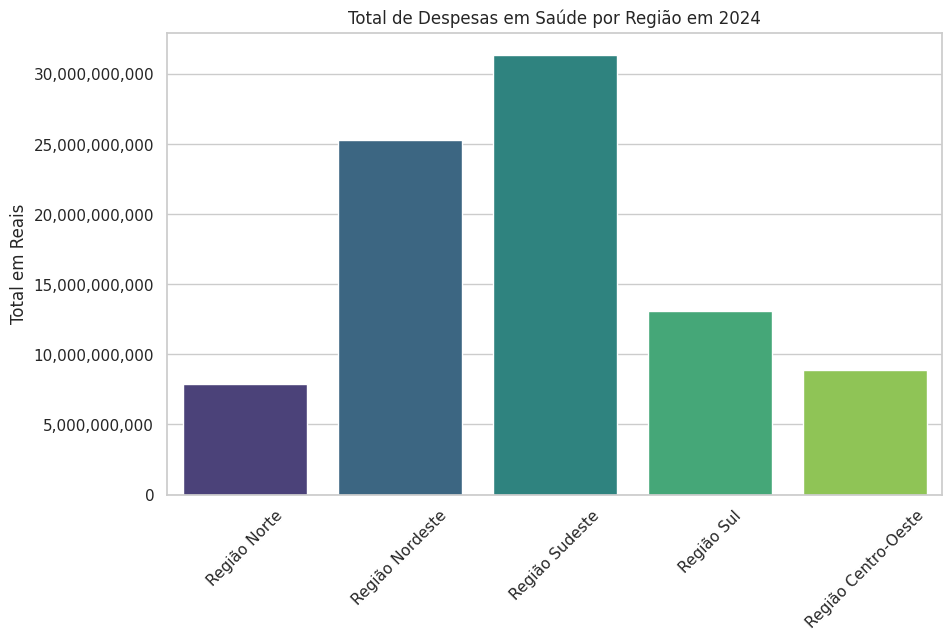

In [ ]:
# Gráfico usando o Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Região', y='Total de despesas em Reais em 2024', data=despesas_saude_2024, palette='viridis')

# Adicionar títulos e labels
plt.title('Total de Despesas em Saúde por Região em 2024')
plt.xlabel('')
plt.ylabel('Total em Reais')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.ticklabel_format(axis='y', style='plain')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Exibir o gráfico
plt.show()

## **Conclusão da 3º Pergunta**

Ao visualizar os dados obtidos em relação à taxa de óbitos e as despesas realizadas pelo governo federal com cada Região, podemos destacar o seguinte:

- A Região Centro-Oeste possui a maior taxa de óbitos em relação à quantidade de casos e teve o 2º menor investimento com saúde. O que pode ser algo a ser relacionado.
- A Região Sudeste, embora teve a maior quantidade de óbitos, teve a 2º menor taxa de óbito em relação à quantidade de casos e teve o maior investimento com saúde. O que também pode ser algo relacionado.
- Em contrapartida, a região Norte teve a menor taxa de óbitos em relação à quantidade de casos e também foi a região que recebeu menos investimento para gastos com Saúde na região.

Logo, não é possível afirmar com certeza de que a taxa de óbito está diretamente relacionada com a falta ou excesso de investimento, mas pode estar coligada a outros fatores como: densidade populacional e fatores climáticos.

# **4º Pergunta: "Sabendo da região que possui mais casos em 2024, é possível prever que será a mesma região com mais casos em 2025?**

Para responder a essas perguntas, vamos buscar cada uma das bases para tentar estabelecer relações com os casos de dengue.

Vamos usar a mesma base de quantidade de casos na pergunta acima para responder esta pergunta

In [ ]:
dados_regiao24 = pd.read_csv('/content/dengue_por_regiao_2024.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
dados_regiao24.head(6)

,Região de notificação,Ign/Branco,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave,Total
0,1 Região Norte,2925.0,11604.0,34406.0,601.0,67.0,49603.0
1,2 Região Nordeste,23123.0,94022.0,212382.0,7956.0,824.0,338307.0
2,3 Região Sudeste,90598.0,726769.0,3174325.0,42246.0,4129.0,4038067.0
3,4 Região Sul,25935.0,160255.0,996846.0,20711.0,1431.0,1205178.0
4,5 Região Centro-Oeste,12648.0,131829.0,484616.0,19754.0,1231.0,650078.0
5,Total,155229.0,1124479.0,4902575.0,91268.0,7682.0,6281233.0


In [ ]:
# Eliminando as colunas de Ign/Branco e Inconclusivo
colunas_dengue = ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']

# Calcular o total das colunas selecionadas
linha_total = dados_regiao24[dados_regiao24['Região de notificação'] == 'Total']
total_dengue = linha_total[colunas_dengue].sum(axis=1).values[0]
total_dengue_formatado = f'{total_dengue:,.0f}'.replace(',', '.')
print(f"Total de casos de Dengue (nas 5 regiões) em 2024: {total_dengue_formatado}")

Total de casos de Dengue (nas 5 regiões) em 2024: 5.001.525


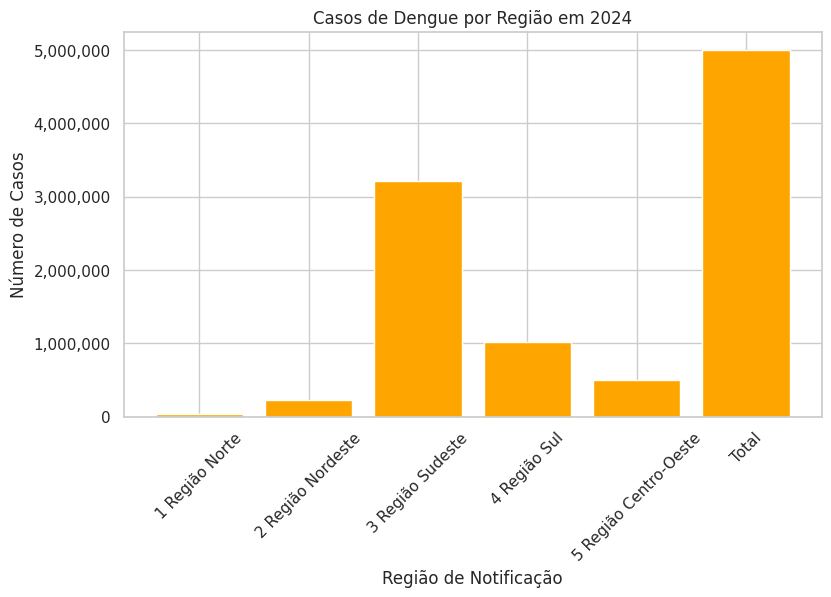

In [ ]:
%matplotlib inline
# Visualizando a região do Brasil com mais casos em 2024
dados_regiao24['Novo Total'] = dados_regiao24['Total'] - dados_regiao24['Inconclusivo'] - dados_regiao24['Ign/Branco']
colunas_relevantes = ["Região de notificação", "Dengue", "Dengue com sinais de alarme", "Dengue grave", "Novo Total"] #Ignoramos as colunas Em branco e Inconclusivo
dados_grafico = dados_regiao24[colunas_relevantes]


plt.figure(figsize=(9, 5))
for coluna in colunas_relevantes[1:]:
    plt.bar(dados_grafico["Região de notificação"], dados_grafico[coluna], label=coluna, color = 'orange')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Configurar título e rótulos
plt.title('Casos de Dengue por Região em 2024')
plt.xlabel('Região de Notificação')
plt.ylabel('Número de Casos')

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Eliminando as colunas de Ign/Branco e Inconclusivo
colunas_dengue = ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']

# Calcular o total das colunas selecionadas
linha_sudeste = dados_regiao24[dados_regiao24['Região de notificação'] == '3 Região Sudeste']
total_dengue_sudeste = linha_sudeste[colunas_dengue].sum(axis=1).values[0]
total_dengue_sudeste_formatado = f'{total_dengue_sudeste:,.0f}'.replace(',', '.')
print(f"Total de casos de Dengue na região Sudeste em 2024: {total_dengue_sudeste_formatado} de casos")

Total de casos de Dengue na região Sudeste em 2024: 3.220.700 de casos


Ao visuzalizar o gráfico e o resultado acima, podemos ver que a região com mais casos em 2024 foi a **região Sudeste** com `3.220.700` casos confirmados.

Será que podemos prever se a região Sudeste também será a mesma região com mais casos em 2025?

Para isso, vamos primeiro fazer uma retrospectiva dos outros anos para ver se a região sudeste foi a com mais casos também.

In [ ]:
dados_regiao20 = pd.read_csv('/content/dengue_por_regiao_2020.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
dados_regiao21 = pd.read_csv('/content/dengue_por_regiao_2021.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
dados_regiao22 = pd.read_csv('/content/dengue_por_regiao_2022.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')
dados_regiao23 = pd.read_csv('/content/dengue_por_regiao_2023.csv', sep=';', skiprows=3, on_bad_lines='skip', encoding='latin1')


In [ ]:
#Definindo as colunas que possuem valor concreto
colunas_dengue = ['Dengue', 'Dengue com sinais de alarme', 'Dengue grave']

def calcular_regiao_com_mais_casos(dados, ano):
    # Filtrar para ignorar a linha "Total"
    dados_filtrados = dados[dados['Região de notificação'] != 'Total'].copy()

    # Somar as colunas de interesse
    dados_filtrados['Total Casos'] = dados_filtrados[colunas_dengue].sum(axis=1)

    # Encontrar a linha com o maior total de casos
    linha_max = dados_filtrados.loc[dados_filtrados['Total Casos'].idxmax()]

    # Imprimir a região com mais casos e o total de casos
    regiao_com_mais_casos = linha_max['Região de notificação']
    total_casos = linha_max['Total Casos']
    total_casos_formatado = f'{total_casos:,.0f}'.replace(',', '.')
    print(f'Região com mais casos em {ano}: {regiao_com_mais_casos} com {total_casos_formatado} casos')

In [ ]:
calcular_regiao_com_mais_casos(dados_regiao20, 2020)
calcular_regiao_com_mais_casos(dados_regiao21, 2021)
calcular_regiao_com_mais_casos(dados_regiao22, 2022)
calcular_regiao_com_mais_casos(dados_regiao23, 2023)
calcular_regiao_com_mais_casos(dados_regiao24, 2024)

Região com mais casos em 2020: 3 Região Sudeste com 266.875 casos
Região com mais casos em 2021: 3 Região Sudeste com 163.955 casos
Região com mais casos em 2022: 3 Região Sudeste com 414.683 casos
Região com mais casos em 2023: 3 Região Sudeste com 698.212 casos
Região com mais casos em 2024: 3 Região Sudeste com 3.220.700 casos


## Fazendo previsões para 2025
Podemos ver que a região Sudeste foi a região que mais registrou casos de dengue nos últimos 5 anos. O que nos leva a pensar que ela provavelmente será a região com mais casos em 2025.

Para isso, vamos fazer uma projeção usando a **Regressão Linear**

Vamos fazer projeções para todas as regiões e veremos as possíveis previsões para 2025 em cada região.

Faremos também o intervalo de confiança para o caso de maior previsão.

In [ ]:
# Anos e casos para as regiões
anos = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
casos_norte = np.array([19073, 37044, 46708, 29403, 35074]).reshape(-1, 1)
casos_nordeste = np.array([81653, 90989, 179538, 77387, 221162]).reshape(-1, 1)
casos_sudeste = np.array([266875, 163955, 414683, 698212, 3220700]).reshape(-1, 1)
casos_sul = np.array([252337, 56962, 296519, 327385, 1018988]).reshape(-1, 1)
casos_centro_oeste = np.array([173072, 98934, 305902, 165195, 505601]).reshape(-1, 1)

# Função para treinar o modelo e fazer a previsão
def prever_casos(anos, casos, ano_previsao):
    modelo = LinearRegression()
    modelo.fit(anos, casos)
    casos_previsao = modelo.predict(np.array([ano_previsao]).reshape(-1, 1))
    return casos_previsao[0, 0]

# Função para calcular o IC via bootstrap
def calcular_ic(anos, casos, ano_previsao, n_bootstrap=1000, alpha=0.05):
    previsoes = []
    for _ in range(n_bootstrap):
        anos_sample, casos_sample = resample(anos, casos)
        previsao = prever_casos(anos_sample, casos_sample, ano_previsao)
        previsoes.append(previsao)
    previsoes = np.array(previsoes)
    lower_bound = np.percentile(previsoes, 100 * alpha / 2)
    upper_bound = np.percentile(previsoes, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

In [ ]:
# Previsão para 2025
ano_previsao = 2025
previsao_sudeste = prever_casos(anos, casos_sudeste, ano_previsao)
previsao_nordeste = prever_casos(anos, casos_nordeste, ano_previsao)
previsao_norte = prever_casos(anos, casos_norte, ano_previsao)
previsao_centro_oeste = prever_casos(anos, casos_centro_oeste, ano_previsao)
previsao_sul = prever_casos(anos, casos_sul, ano_previsao)

In [ ]:
print(f'Previsão de casos de Dengue para a Região Norte em 2025: {previsao_norte:,.0f} casos')
print(f'Previsão de casos de Dengue para a Região Nordeste em 2025: {previsao_nordeste:,.0f} casos')
print(f'Previsão de casos de Dengue para a Região Centro-Oeste em 2025: {previsao_centro_oeste:,.0f} casos')
print(f'Previsão de casos de Dengue para a Região Sudeste em 2025: {previsao_sudeste:,.0f} casos')
print(f'Previsão de casos de Dengue para a Região Sul em 2025: {previsao_sul:,.0f} casos')

Previsão de casos de Dengue para a Região Norte em 2025: 40,769 casos
Previsão de casos de Dengue para a Região Nordeste em 2025: 209,771 casos
Previsão de casos de Dengue para a Região Centro-Oeste em 2025: 469,137 casos
Previsão de casos de Dengue para a Região Sudeste em 2025: 2,885,457 casos
Previsão de casos de Dengue para a Região Sul em 2025: 931,556 casos


In [ ]:
from sklearn.utils import resample

# Calcular IC para a região Sudeste
ic_sudeste_lower, ic_sudeste_upper = calcular_ic(anos, casos_sudeste, ano_previsao)

In [ ]:
print(f'Intervalo de confiança para a Região Sudeste em 2025: [{ic_sudeste_lower:,.0f}, {ic_sudeste_upper:,.0f}] casos')

Intervalo de confiança para a Região Sudeste em 2025: [503,777, 4,463,783] casos


## Por fim, vamos plotar os resultados das regressões lineares em um gráfico para facilitar a visualização.



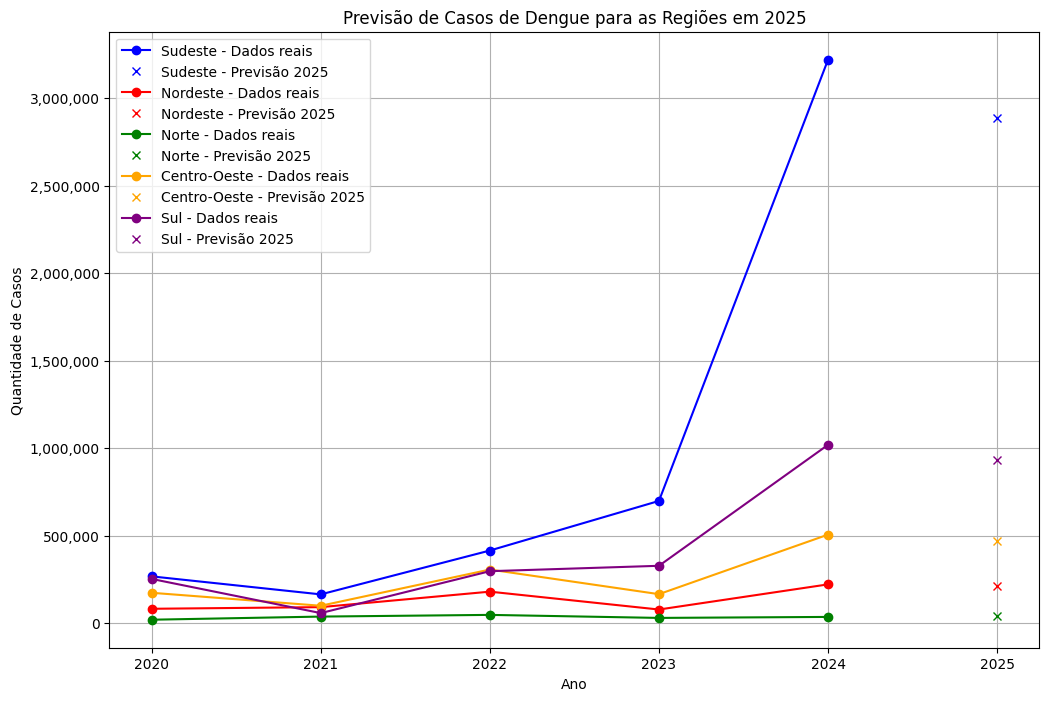

In [ ]:
# Dados reais e previsões para cada região
plt.figure(figsize=(12, 8))
plt.plot(anos, casos_sudeste, marker='o', linestyle='-', label='Sudeste - Dados reais', color='blue')
plt.plot([2025], [previsao_sudeste], marker='x', linestyle='', label='Sudeste - Previsão 2025', color='blue')

plt.plot(anos, casos_nordeste, marker='o', linestyle='-', label='Nordeste - Dados reais', color='red')
plt.plot([2025], [previsao_nordeste], marker='x', linestyle='', label='Nordeste - Previsão 2025', color='red')

plt.plot(anos, casos_norte, marker='o', linestyle='-', label='Norte - Dados reais', color='green')
plt.plot([2025], [previsao_norte], marker='x', linestyle='', label='Norte - Previsão 2025', color='green')

plt.plot(anos, casos_centro_oeste, marker='o', linestyle='-', label='Centro-Oeste - Dados reais', color='orange')
plt.plot([2025], [previsao_centro_oeste], marker='x', linestyle='', label='Centro-Oeste - Previsão 2025', color='orange')

plt.plot(anos, casos_sul, marker='o', linestyle='-', label='Sul - Dados reais', color='purple')
plt.plot([2025], [previsao_sul], marker='x', linestyle='', label='Sul - Previsão 2025', color='purple')

plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')
plt.title('Previsão de Casos de Dengue para as Regiões em 2025')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend()
plt.grid(True)
plt.show()

## **Conclusão da 4º Pergunta**

Com base na análise dos dados históricos de casos de dengue nas diferentes regiões do Brasil, foi possível observar que a ```Região Sudeste``` consistentemente apresentou o maior número de casos nos últimos cinco anos. Utilizando um modelo de regressão linear para prever os casos de dengue em 2025, a previsão confirmou que a ```Região Sudeste``` continuará a ser a região com o maior número de casos. Essa tendência pode ser atribuída a diversos fatores, incluindo a alta densidade populacional, condições climáticas favoráveis à proliferação do mosquito Aedes aegypti, e possivelmente, fatores socioeconômicos que dificultam o controle eficaz da doença.

Porém, não podemos afirmar com 100% de certeza. Mesmo assim, essa previsão é crucial para orientar ações preventivas e estratégicas no combate à dengue, visando a redução dos casos e minimização dos impactos na saúde pública.